数据格式
```json
[
  {"text": "This is a sentence.", "label": 1},
  {"text": "Another example.", "label": 0}
]
```

In [1]:
from datasets import load_dataset
import pandas as pd
from tqdm import tqdm
import os
import glob
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
import ast
import csv


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(3407)  # 为了保持结果一致，设置随机种子

In [4]:
import os
import requests

os.environ['http_proxy'] = 'http://192.168.22.3:7890'
os.environ['https_proxy'] = 'http://192.168.22.3:7890'

response = requests.get('http://huggingface.co')
response

<Response [200]>

In [2]:
np.random.seed(3407)  # 为了保持结果一致，设置随机种子

### 数据统计
- 读取所有数据并分析

In [3]:
law_contents_1 = []
result = []
directory = '/root/for_may_conference/tele-chat_old/data/all_data/法律法规'
txt_files = []
for subdirs, dirs, files in os.walk(directory):
    txt_files = glob.glob(os.path.join(subdirs, '*.txt'))
    for txt_file in txt_files:
        with open(os.path.join(directory, txt_file), 'r') as f:
            content = f.read()
            # 删除前三行
            content = '\n'.join(content.split('\n')[2:])
            if content == '':
                continue
            content = content.replace('\n','').replace(' ','').replace('\t','').replace('\u3000\u3000','').replace('\xa0','').replace('文件内容：','')
            law_contents_1.append(content)

In [4]:
df = pd.DataFrame({'text': law_contents_1, 'label': "法律1"})

In [ ]:
df

In [5]:
zw_contents = []
result = []
directory = '/root/for_may_conference/tele-chat_old/data/all_data'
txt_files = []
for subdirs, dirs, files in os.walk(directory):
    # 移除法律法规文件夹，确保 os.walk 不递归进入该文件夹
    if '法律法规' in dirs:
        dirs.remove('法律法规')
    
    # 匹配当前目录下的所有 .txt 文件
    txt_files = glob.glob(os.path.join(subdirs, '*.txt'))
    
    for txt_file in txt_files:
        with open(txt_file, 'r', encoding='utf-8') as f:  # 修复路径拼接问题
            content = f.read()
            
            # 删除前三行
            content = '\n'.join(content.split('\n')[3:])
            
            if content == '':
                continue
            
            # 清理无效字符
            content = content.replace('\n','').replace(' ','').replace('\t','')\
                .replace('\u3000\u3000','').replace('\xa0','').replace('文件内容：','')
            
            zw_contents.append(content)

In [12]:
len(zw_contents)

40040

In [6]:
new_data = pd.DataFrame({'text': zw_contents, 'label': '政务'})

In [7]:
df = pd.concat([df, new_data], ignore_index=True)

In [8]:
df['label'].value_counts()

政务     40040
法律1    21493
Name: label, dtype: int64

In [ ]:
df

In [9]:
dataset=load_dataset('json',data_files='/root/for_may_conference/remake/data0.jsonl')
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'meta'],
        num_rows: 714
    })
})

In [ ]:
df_temp=pd.DataFrame(dataset['train'])
df_temp

In [38]:
type(df_temp.iloc[0]['text'])

str

In [ ]:
str=df_temp.iloc[0]['text']
str

In [45]:
str='[{"行号": 0, "是否重复": false, "是否跨文件重复": false, "md5": "265b07f93cdff13a12530c37c78c6e40", "内容": "\ufeff（Log：提取版本日期2022年6月1日,每季发现问题，整体重做新版本,请勿下载早期淘汰版:hellohellohello.taobao.com）"}, {"行号": 1, "是否重复": false, "是否跨文件重复": false, "md5": "8df954a6c0fa8150572c7ebeae0be37e", "内容": "Author: bao.jin"}]'

In [11]:
# 去掉提取的前 7 个内容再拼接
df_temp["content_combined"] = df_temp["text"].apply(
    lambda x: " ".join([item["内容"] for item in json.loads(x)][7:])
)

In [ ]:
df_temp

In [12]:
columns_to_keep = ["content_combined"]

In [13]:
df_temp = df_temp[columns_to_keep]

In [14]:
df_temp['label']="企业"

/tmp/ipykernel_2798250/859710097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['label']="企业"


In [15]:
df_temp.columns = ['text', 'label']

In [ ]:
df_temp

In [17]:
df_total = pd.concat([df, df_temp], ignore_index=True)

In [ ]:
df_total

In [18]:
df_total['label'].value_counts()

政务     40040
法律1    21493
企业       714
Name: label, dtype: int64

In [19]:
dataset=load_dataset('json',data_files='/root/for_may_conference/remake/1.jsonl')
dataset

DatasetDict({
    train: Dataset({
        features: ['id', '问', '答', '来源', '元数据'],
        num_rows: 13018
    })
})

In [ ]:
df_temp=pd.DataFrame(dataset['train'])
df_temp

In [21]:
columns_to_keep = ["答"]

In [22]:
df_temp = df_temp[columns_to_keep]

In [23]:
df_temp.columns = ['text']

In [24]:
df_temp['label']="外交"

/tmp/ipykernel_2798250/3597793064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['label']="外交"


In [ ]:
df_temp

In [25]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [26]:
df_total['label'].value_counts()

政务     40040
法律1    21493
外交     13018
企业       714
Name: label, dtype: int64

In [27]:
dataset=load_dataset('json',data_files='/root/for_may_conference/remake/2.jsonl')
dataset

DatasetDict({
    train: Dataset({
        features: ['文件名', '是否待查文件', '是否重复文件', '文件大小', 'simhash', '最长段落长度', '段落数', '去重段落数', '低质量段落数', '段落'],
        num_rows: 119704
    })
})

In [28]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_temp = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_temp = pd.concat([df_temp, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_temp.head())

Converting to DataFrame: 100%|██████████| 12/12 [00:32<00:00,  2.68s/it]

                                                 文件名  是否待查文件  是否重复文件   文件大小  \
0  /Users/liuhui/Downloads/rmrb/7z/1953年02月/1953-...   False   False    280   
1  /Users/liuhui/Downloads/rmrb/7z/1953年02月/1953-...   False   False   2062   
2  /Users/liuhui/Downloads/rmrb/7z/1953年02月/1953-...   False   False   2583   
3  /Users/liuhui/Downloads/rmrb/7z/1953年02月/1953-...   False   False   9205   
4  /Users/liuhui/Downloads/rmrb/7z/1953年02月/1953-...   False   False  11039   

        simhash  最长段落长度  段落数  去重段落数  低质量段落数  \
0  1.356323e+18      54    6      6       0   
1  1.165731e+19     463    8      8       0   
2  1.685378e+19     177   13     13       0   
3  5.191247e+18     654   14     14       0   
4  3.648217e+18     655   18     18       0   

                                                  段落  
0  [{'行号': 0, '是否重复': False, '是否跨文件重复': False, 'm...  
1  [{'行号': 0, '是否重复': False, '是否跨文件重复': False, 'm...  
2  [{'行号': 0, '是否重复': False, '是否跨文件重复': False, 'm...  
3  [{'行号': 0, '是否重复': 

In [29]:

# 定义一个函数来提取并拼接 '内容' 字段
def concatenate_content(paragraphs):
    return ''.join([entry['内容'] for entry in paragraphs])

In [30]:
# 应用函数，创建新的 'context' 列
df_temp['text'] = df_temp['段落'].apply(concatenate_content)

In [ ]:
df_temp

In [31]:
# 去掉开头的 ###
df_temp['text'] = df_temp['text'].str.lstrip('#')


In [ ]:
df_temp

In [32]:
df_temp.iloc[0]

文件名        /Users/liuhui/Downloads/rmrb/7z/1953年02月/1953-...
是否待查文件                                                 False
是否重复文件                                                 False
文件大小                                                     280
simhash                                1356322653384481792.0
最长段落长度                                                    54
段落数                                                        6
去重段落数                                                      6
低质量段落数                                                     0
段落         [{'行号': 0, '是否重复': False, '是否跨文件重复': False, 'm...
text        关于提案审查报告的决议1953-02-08第1版()专栏：关于提案审查报告的决议中国人民政...
Name: 0, dtype: object

In [35]:
columns_to_keep = ["text"]
df_temp = df_temp[columns_to_keep]

In [36]:
df_temp['label']="新闻"

In [37]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [38]:
df_total['label'].value_counts()

新闻     119704
政务      40040
法律1     21493
外交      13018
企业        714
Name: label, dtype: int64

In [39]:
# 读取原始文件并移除 NUL 字符
with open('/root/for_may_conference/remake/douban_dushu_4.csv', 'rb') as f:
    content = f.read()

# 替换掉 NUL 字符
cleaned_content = content.replace(b'\x00', b'')

# 保存为新文件
with open('/root/for_may_conference/remake/douban_dushu_4.csv', 'wb') as f:
    f.write(cleaned_content)

In [40]:
with open('/root/for_may_conference/remake/douban_dushu_4.csv', 'r', encoding='utf-8') as infile, open('cleaned_file.csv', 'w', newline='', encoding='utf-8') as outfile:
    reader = csv.reader(infile, delimiter='。', quoting=csv.QUOTE_NONE)
    writer = csv.writer(outfile)

    for line in reader:
        writer.writerow(line)

In [41]:
df_temp = pd.read_csv('douban_cleaned_file.csv')

In [ ]:
df_temp

In [42]:
columns_to_keep = ["comment"]
df_temp = df_temp[columns_to_keep]

In [43]:
df_temp.columns=["text"]

In [44]:
df_temp['label']="douban"

In [45]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [46]:
df_total['label'].value_counts()

douban    3750698
新闻         119704
政务          40040
法律1         21493
外交          13018
企业            714
Name: label, dtype: int64

In [47]:
dataset=load_dataset('json',data_files='/root/for_may_conference/remake/GovReport.jsonl')
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'meta'],
        num_rows: 1537
    })
})

In [ ]:
df_temp=pd.DataFrame(dataset['train'])
df_temp

In [49]:
columns_to_keep = ["text"]
df_temp = df_temp[columns_to_keep]

In [50]:
df_temp['label']="政府工作报告"

In [51]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [52]:
df_total['label'].value_counts()

douban    3750698
新闻         119704
政务          40040
法律1         21493
外交          13018
政府工作报告       1537
企业            714
Name: label, dtype: int64

In [53]:
data_dict = df_total.to_dict(orient="records")

In [54]:
data_dict[:5]

[{'text': '安徽省实施《中华人民共和国土地管理法》办法\u200b（1987年12月20日安徽省第六届人民代表大会常务委员会第三十三次会议通过\u3000根据1989年7月7日安徽省第七届人民代表大会常务委员会第十一次会议关于修改《安徽省实施〈中华人民共和国土地管理法〉办法》的决定第一次修正\u3000根据1992年12月19日安徽省第七届人民代表大会常务委员会第三十四次会议关于修改《安徽省实施〈中华人民共和国土地管理法〉办法》的决定第二次修正\u3000根据1997年11月2日安徽省第八届人民代表大会常务委员会第三十四次会议关于修订《安徽省实施〈中华人民共和国产品质量法〉办法》等地方性法规的决定第三次修正\u30002000年9月22日安徽省第九届人民代表大会常务委员会第十八次会议第一次修订\u3000根据2004年6月26日安徽省第十届人民代表大会常务委员会第十次会议关于修改《安徽省实施〈中华人民共和国土地管理法〉办法》的决定第一次修正\u3000根据2015年3月26日安徽省第十二届人民代表大会常务委员会第十八次会议关于修改《安徽省实施〈中华人民共和国土地管理法〉办法》等部分法规的决定第二次修正\u30002022年5月27日安徽省第十三届人民代表大会常务委员会第三十四次会议第二次修订）\u200b目录第一章\u3000总则第二章\u3000国土空间规划第三章\u3000耕地保护第四章\u3000农用地转用和土地征收第五章\u3000建设用地第六章\u3000监督检查第七章\u3000法律责任第八章\u3000附则\u200b第一章\u3000总则\u200b第一条\u3000根据《中华人民共和国土地管理法》《中华人民共和国土地管理法实施条例》和有关法律、行政法规，结合本省实际，制定本办法。第二条\u3000本办法适用于本省行政区域内土地的保护、开发、利用及其监督管理活动。第三条\u3000土地管理应当贯彻十分珍惜、合理利用土地和切实保护耕地的基本国策，全面规划，严格管理，保护、开发土地资源，节约集约用地；实行土地全生命周期管理，加强生态保护和修复，推动绿色发展。各级人民政府应当加强对土地管理工作的领导，制止非法占用土地和破坏土地资源的行为。第四条\u3000县级以上人民政府自然资源主管部门统一负责本行政区域内土地的管理和监督工作。县级以上人民政府农

In [55]:
# 保存为 JSON 文件，带缩进
with open("data.json", "w", encoding="utf-8") as f:
    json.dump(data_dict, f, indent=4, ensure_ascii=False)

In [56]:
dataset=load_dataset('json',data_files='/root/for_may_conference/remake/data.json')
dataset

Generating train split: 3947204 examples [00:39, 99643.33 examples/s] 


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 3947204
    })
})

In [9]:
from datasets import load_dataset

# 加载单个 Parquet 文件
dataset = load_dataset("parquet", data_files="/root/for_may_conference/remake/rank_00010.parquet")

In [10]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'alnum_ratio', 'avg_line_length', 'char_rep_ratio', 'flagged_words_ratio', 'max_line_length', 'num_words', 'perplexity', 'quality_score', 'special_char_ratio', 'word_rep_ratio', '_id', 'industry_type'],
        num_rows: 76666
    })
})

In [ ]:
df_temp=pd.DataFrame(dataset['train'])
df_temp

In [12]:
columns_to_keep = ["text"]
df_temp = df_temp[columns_to_keep]

In [13]:
df_temp=df_temp[:10000]

In [14]:
df_temp['label']="农业"

In [15]:
df_total=df_temp

In [16]:
df_total['label'].value_counts()

农业    10000
Name: label, dtype: int64

In [17]:
# 加载单个 Parquet 文件
dataset = load_dataset("parquet", data_files="/root/for_may_conference/remake/rank_00026.parquet")

In [18]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'alnum_ratio', 'avg_line_length', 'char_rep_ratio', 'flagged_words_ratio', 'max_line_length', 'num_words', 'perplexity', 'quality_score', 'special_char_ratio', 'word_rep_ratio', '_id', 'industry_type'],
        num_rows: 171004
    })
})

In [19]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_temp = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_temp = pd.concat([df_temp, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_temp.head())

Converting to DataFrame: 100%|██████████| 18/18 [00:08<00:00,  2.15it/s]

                                                text  alnum_ratio  \
0  最近呛马活动似乎越演越烈,"包围马英九行动"宣称要遍地开花.即使马英九赴云林科技大学宣示能源...     0.904997   
1  1949年10月1日,新中国开国大典,当游行群众高喊着"人民共和国万岁""毛主席万岁"走过长...     0.908628   
2  中央组织部印发"党委(党组)书记抓基层党建工作述职评议考核办法(试行)"\n近日,中共中央组...     0.875963   
3  历史的进程有多么波澜壮阔,产生的影响就有多么广阔深远.\n1978年12月,我们党召开十一届...     0.855197   
4  习近平总书记指出,为中国人民谋幸福,为中华民族谋复兴,是中国共产党人的初心和使命,是激励一代...     0.914378   

   avg_line_length  char_rep_ratio  flagged_words_ratio  max_line_length  \
0       147.363636        0.003722                  0.0              226   
1       311.000000        0.003760                  0.0             1124   
2        92.714286        0.051797                  0.0              221   
3        61.194444        0.002279                  0.0              144   
4       311.090909        0.050396                  0.0              506   

   num_words  perplexity  quality_score  special_char_ratio  word_rep_ratio  \
0        353      1368.8       4.113281          

In [20]:
columns_to_keep = ["text"]
df_temp = df_temp[columns_to_keep]

In [21]:
df_temp['label']="时政"

In [22]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [23]:
df_total['label'].value_counts()

时政    171004
农业     10000
Name: label, dtype: int64

In [24]:
# 加载单个 Parquet 文件
dataset = load_dataset("parquet", data_files="/root/for_may_conference/remake/rank_00041.parquet")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'alnum_ratio', 'avg_line_length', 'char_rep_ratio', 'flagged_words_ratio', 'max_line_length', 'num_words', 'perplexity', 'quality_score', 'special_char_ratio', 'word_rep_ratio', '_id', 'industry_type'],
        num_rows: 123256
    })
})

In [25]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_temp = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_temp = pd.concat([df_temp, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_temp.head())

Converting to DataFrame: 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                                                text  alnum_ratio  \
0  称重传感器对电容以及电厂的要求是什么?\n如何选择适合的压力变送器?\n负载传感器实际上是一...     0.897858   
1  2020年光伏发电上网电价政策印发 中国光伏产业现状及发展趋势分析(附图表)\n中商情报网讯...     0.872009   
2  快到大寒节气了,全国各地持续降温,我们在给自己增添衣物的同时也不要忘了为激光器做好防冻措施....     0.903727   
3  全球人口的增长加重了削减碳排放以及避免严重气候变化的压力.\n中国及其他国家的人口出生率上升...     0.910574   
4  2022年3月,团中央青年志愿者行动指导中心,中国核工业集团有限公司,中国青年志愿者协会秘书...     0.904876   

   avg_line_length  char_rep_ratio  flagged_words_ratio  max_line_length  \
0        67.444444        0.000000                  0.0              170   
1        85.571429        0.033557                  0.0              297   
2        74.307692        0.004180                  0.0              158   
3       103.437500        0.008505                  0.0              256   
4       104.250000        0.008052                  0.0              238   

   num_words  perplexity  quality_score  special_char_ratio  word_rep_ratio  \
0        126       812.5       4.003906          

In [26]:
columns_to_keep = ["text"]
df_temp = df_temp[columns_to_keep]

In [27]:
df_temp['label']="电力"

In [28]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [29]:
df_total['label'].value_counts()

时政    171004
电力    123256
农业     10000
Name: label, dtype: int64

In [30]:
# 加载单个 Parquet 文件
dataset = load_dataset("parquet", data_files="/root/for_may_conference/remake/rank_00044.parquet")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'alnum_ratio', 'avg_line_length', 'char_rep_ratio', 'flagged_words_ratio', 'max_line_length', 'num_words', 'perplexity', 'quality_score', 'special_char_ratio', 'word_rep_ratio', '_id', 'industry_type'],
        num_rows: 93415
    })
})

In [31]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_temp = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_temp = pd.concat([df_temp, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_temp.head())

Converting to DataFrame: 100%|██████████| 10/10 [00:03<00:00,  2.59it/s]

                                                text  alnum_ratio  \
0  天桥八大怪产生于北京天桥.他们相貌奇特,言行怪异,身怀绝技,深为广大群众的喜爱.这"怪"字不...     0.866373   
1  样板戏样板戏是指"文革"时期被树立为"革命样板戏"的以戏剧为主的二十几个舞台艺术作品的俗称....     0.842189   
2  八岔戏,又称"七岔戏","花鼓戏","小调戏","岔口戏".八岔戏是流传在陕西汉滨区的一个新...     0.803878   
3  原文地址:纪录片的两种拍摄方式分析作者:普澜_881_4421,介入式记录 即拍摄者参与到所...     0.924873   
4  鼎益丰隋广义从小就是一个影迷,她热爱这一切美好的文化艺术,欣赏美,赞叹美,这是一种愉悦.而在...     0.852720   

   avg_line_length  char_rep_ratio  flagged_words_ratio  max_line_length  \
0          14967.0        0.019588                  0.0            14967   
1           5627.0        0.027946                  0.0             5627   
2           4023.0        0.009965                  0.0             4023   
3            985.0        0.000000                  0.0              985   
4           1195.0        0.010118                  0.0             1195   

   num_words  perplexity  quality_score  special_char_ratio  word_rep_ratio  \
0       4403      1047.7       4.054688          

In [32]:
columns_to_keep = ["text"]
df_temp = df_temp[columns_to_keep]

In [33]:
df_temp['label']="娱乐"

In [34]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [35]:
df_total['label'].value_counts()

时政    171004
电力    123256
娱乐     93415
农业     10000
Name: label, dtype: int64

In [36]:
# 加载单个 Parquet 文件
dataset = load_dataset("parquet", data_files="/root/for_may_conference/remake/rank_00045.parquet")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'alnum_ratio', 'avg_line_length', 'char_rep_ratio', 'flagged_words_ratio', 'max_line_length', 'num_words', 'perplexity', 'quality_score', 'special_char_ratio', 'word_rep_ratio', '_id', 'industry_type'],
        num_rows: 206765
    })
})

In [37]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_temp = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_temp = pd.concat([df_temp, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_temp.head())

Converting to DataFrame: 100%|██████████| 21/21 [00:07<00:00,  2.89it/s]

                                                text  alnum_ratio  \
0  东方网4月10日消息:今天,人民币对美元汇率中间价今天报 6.9920 ,首次从"破7"进入...     0.882486   
1  国务院办公厅印发了"关于推动个人养老金发展的意见"(简称"意见"),对于完善我国基本养老保险...     0.902247   
2  从海关总署获悉:2021年,全国综合保税区实现进出口值5.9万亿元,同比增长23.8%,较同...     0.887624   
3  为减轻消费者负担,我国政府今年预计承担高达773亿令吉巨额补贴,以稳定物价及避免我国通膨率飙...     0.866799   
4  本文摘要:经济危机之后,央企及地方国企的海外并购潮风起云涌,也经常出现了不少问题,有些甚至经...     0.917760   

   avg_line_length  char_rep_ratio  flagged_words_ratio  max_line_length  \
0       147.500000        0.028393                  0.0              380   
1       183.000000        0.003044                  0.0              338   
2       140.600000        0.011527                  0.0              191   
3        55.888889        0.050667                  0.0              117   
4       198.200000        0.041561                  0.0              365   

   num_words  perplexity  quality_score  special_char_ratio  word_rep_ratio  \
0        478      1875.1       4.109375          

In [38]:
columns_to_keep = ["text"]
df_temp = df_temp[columns_to_keep]

In [39]:
df_temp['label']="经济"

In [40]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [41]:
df_total['label'].value_counts()

经济    206765
时政    171004
电力    123256
娱乐     93415
农业     10000
Name: label, dtype: int64

In [42]:
# 加载单个 Parquet 文件
dataset = load_dataset("parquet", data_files="/root/for_may_conference/remake/rank_00058.parquet")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'alnum_ratio', 'avg_line_length', 'char_rep_ratio', 'flagged_words_ratio', 'max_line_length', 'num_words', 'perplexity', 'quality_score', 'special_char_ratio', 'word_rep_ratio', '_id', 'industry_type'],
        num_rows: 203503
    })
})

In [43]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_temp = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_temp = pd.concat([df_temp, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_temp.head())

Converting to DataFrame: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]

                                                text  alnum_ratio  \
0  民间推动台湾落实CEDAW联盟,23日于立法院召开记者会,针对五院落实CEDAW的监督机制提...     0.919852   
1  这一期的天下杂志公布了"台湾社会信任度调查",法官信任度敬陪末座,只有28.4%;前几天蔡英...     0.857143   
2  网络,给现代人的生活带来很多便利.然而,网上色情信息,却像毒品一样吞噬着青少年的心灵.据新华...     0.884369   
3  我国关于未成年人的法律,将迎来一次重要调整.\n据央视新闻报道,十三届全国人大常委会第二十一...     0.907407   
4  新华网北京9月19日电(鹿永建,姜琳)表彰道德楷模的活动这两天达到高潮.一批从普通人中走出的...     0.906141   

   avg_line_length  char_rep_ratio  flagged_words_ratio  max_line_length  \
0       108.133333        0.062616                  0.0              196   
1       211.166667        0.030207                  0.0              571   
2       104.190476        0.000000                  0.0              291   
3       108.000000        0.085470                  0.0              221   
4       143.833333        0.000000                  0.0              165   

   num_words  perplexity  quality_score  special_char_ratio  word_rep_ratio  \
0        443      1514.2       4.031250          

In [44]:
columns_to_keep = ["text"]
df_temp = df_temp[columns_to_keep]

In [45]:
df_temp['label']="法律"

In [46]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [47]:
df_total['label'].value_counts()

经济    206765
法律    203503
时政    171004
电力    123256
娱乐     93415
农业     10000
Name: label, dtype: int64

In [48]:
# 加载单个 Parquet 文件
dataset = load_dataset("parquet", data_files="/root/for_may_conference/remake/rank_00082.parquet")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'alnum_ratio', 'avg_line_length', 'char_rep_ratio', 'flagged_words_ratio', 'max_line_length', 'num_words', 'perplexity', 'quality_score', 'special_char_ratio', 'word_rep_ratio', '_id', 'industry_type'],
        num_rows: 71522
    })
})

In [49]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_temp = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_temp = pd.concat([df_temp, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_temp.head())

Converting to DataFrame: 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                                                text  alnum_ratio  \
0  当我们的读者厌倦了传统报道的阴沉时,我们记者应该怎么做?\n在意大利佩鲁贾举行的国际新闻节期...     0.896135   
1  正在举办的2020年东京奥运会正吸引着全世界的关注目光.中央广播电视总台在东京奥运现场派驻了...     0.928823   
2  多年来,各领域专家的注意力都集中在研究一个叫做信息战的问题上. 但近年来,对它的兴趣增加了....     0.868512   
3  张翠容(Susanna)是香港独立新闻工作者,亚洲著名的女战地记者.过去多年,她走访不少第三...     0.898957   
4  新华社北京1月25日电 中共中央政治局1月25日上午就全媒体时代和媒体融合发展举行第十二次集...     0.888179   

   avg_line_length  char_rep_ratio  flagged_words_ratio  max_line_length  \
0        88.714286        0.008110                  0.0              173   
1       236.500000        0.017730                  0.0              501   
2       106.473684        0.012706                  0.0              487   
3       127.833333        0.000000                  0.0              202   
4       182.583333        0.000917                  0.0              317   

   num_words  perplexity  quality_score  special_char_ratio  word_rep_ratio  \
0        309       851.3       4.222656          

In [50]:
columns_to_keep = ["text"]
df_temp = df_temp[columns_to_keep]

In [51]:
df_temp['label']="新闻"

In [52]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [53]:
df_total['label'].value_counts()

经济    206765
法律    203503
时政    171004
电力    123256
娱乐     93415
新闻     71522
农业     10000
Name: label, dtype: int64

In [54]:
# 加载单个 Parquet 文件
dataset = load_dataset("parquet", data_files="/root/for_may_conference/remake/rank_00092.parquet")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'alnum_ratio', 'avg_line_length', 'char_rep_ratio', 'flagged_words_ratio', 'max_line_length', 'num_words', 'perplexity', 'quality_score', 'special_char_ratio', 'word_rep_ratio', '_id', 'industry_type'],
        num_rows: 241737
    })
})

In [55]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_temp = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_temp = pd.concat([df_temp, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_temp.head())

Converting to DataFrame: 100%|██████████| 25/25 [00:08<00:00,  2.82it/s]

                                                text  alnum_ratio  \
0  石雕牌坊是指用石头修建的牌坊,是一种装饰建筑物.常见于古代陵园.如北京明代陵墓外面的大红门前...     0.837725   
1  6月21日,印度尼西亚雅万高铁2号隧道顺利贯通,标志着雅万高铁全线13座隧道实现全部贯通,为...     0.891037   
2  习大大总书记在2016年视察重庆及2018年参加重庆代表团审议时指出,重庆要建设内陆开放高地...     0.891724   
3  水景在园林绿化工程中是一个不可多得的元素,它具有很强的灵动性,能起到组织空间的作用,如果能充...     0.881154   
4  近年来,肃州区践行人与自然和谐共生的理念,坚持"首善"品质,下足"绣花"功夫,夯实城建强基础...     0.866982   

   avg_line_length  char_rep_ratio  flagged_words_ratio  max_line_length  \
0       120.166667        0.002809                  0.0              336   
1       131.307692        0.029446                  0.0              268   
2       133.916667        0.003755                  0.0              235   
3        98.166667        0.000000                  0.0              121   
4        82.277778        0.004076                  0.0              156   

   num_words  perplexity  quality_score  special_char_ratio  word_rep_ratio  \
0        204       704.4       4.042969          

In [56]:
columns_to_keep = ["text"]
df_temp = df_temp[columns_to_keep]

In [57]:
df_temp['label']="房地产"

In [58]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [59]:
df_total['label'].value_counts()

房地产    241737
经济     206765
法律     203503
时政     171004
电力     123256
娱乐      93415
新闻      71522
农业      10000
Name: label, dtype: int64

In [60]:
# 加载单个 Parquet 文件
dataset = load_dataset("parquet", data_files="/root/for_may_conference/remake/rank_00101.parquet")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'alnum_ratio', 'avg_line_length', 'char_rep_ratio', 'flagged_words_ratio', 'max_line_length', 'num_words', 'perplexity', 'quality_score', 'special_char_ratio', 'word_rep_ratio', '_id', 'industry_type'],
        num_rows: 212159
    })
})

In [61]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_temp = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_temp = pd.concat([df_temp, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_temp.head())

Converting to DataFrame: 100%|██████████| 22/22 [00:08<00:00,  2.74it/s]

                                                text  alnum_ratio  \
0  孩子进入初三,面临中考,家长要做哪些事才不至于帮倒忙?孩子在紧张忙碌学习的时候,初三家长不要...     0.882154   
1  普通话水平测试是促进国家通用语言文字推广普及和应用的重要举措.为贯彻落实习近平总书记关于推广...     0.913203   
2  95%中小学校配专兼职心理健康员\n"辽宁省妇女发展规划(2021 - 2030年)"和"辽...     0.852965   
3  增强实现中华民族伟大复兴的精神力量(人民观察)\n文化是一个国家,一个民族的灵魂.党的二十大...     0.914306   
4  如不被保护,上海话将面临"断层危机",为此沪语专家钱乃荣呼吁学校提高宽容度,以防沪语衰亡.\...     0.877778   

   avg_line_length  char_rep_ratio  flagged_words_ratio  max_line_length  \
0        95.258065        0.000679                  0.0              258   
1       818.000000        0.000000                  0.0              818   
2        93.384615        0.009921                  0.0              259   
3       232.416667        0.050000                  0.0              519   
4       132.631579        0.008761                  0.0              269   

   num_words  perplexity  quality_score  special_char_ratio  word_rep_ratio  \
0        913      1124.0       4.222656          

In [62]:
columns_to_keep = ["text"]
df_temp = df_temp[columns_to_keep]

In [63]:
df_temp['label']="教育"

In [64]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [65]:
df_total['label'].value_counts()

房地产    241737
教育     212159
经济     206765
法律     203503
时政     171004
电力     123256
娱乐      93415
新闻      71522
农业      10000
Name: label, dtype: int64

In [66]:
# 加载单个 Parquet 文件
dataset = load_dataset("parquet", data_files="/root/for_may_conference/remake/rank_00123.parquet")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'alnum_ratio', 'avg_line_length', 'char_rep_ratio', 'flagged_words_ratio', 'max_line_length', 'num_words', 'perplexity', 'quality_score', 'special_char_ratio', 'word_rep_ratio', '_id', 'industry_type'],
        num_rows: 236847
    })
})

In [67]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_temp = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_temp = pd.concat([df_temp, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_temp.head())

Converting to DataFrame: 100%|██████████| 24/24 [00:09<00:00,  2.59it/s]

                                                text  alnum_ratio  \
0  我是一名从事理论物理研究(引力理论和宇宙学研究方向)的科研人员,就自己的知识和认识,我感受到...     0.910771   
1  行星究竟是如何形成的?\n多年来,科学家认为他们可以通过研究那个最"唾手可得"的例子来了解这...     0.902204   
2  把液体混合物进行多次部分汽化,同时又把产生的蒸汽多次部分冷凝,使混合物分离为所要求组分的操作...     0.924675   
3  机器人的研究已经有了长足的发展所有的机械劳动理论上都可以被机器人代替从现在日益成熟的工业机器...     0.934565   
4  袁隆平,钟南山,陆元九,王品先,潘际銮等一大批先进知识分子以时不我待,争朝夕的精神投入工作,...     0.911605   

   avg_line_length  char_rep_ratio  flagged_words_ratio  max_line_length  \
0        94.700000        0.003183                  0.0              201   
1        75.103448        0.001844                  0.0              157   
2       128.333333        0.015957                  0.0              153   
3       134.379310        0.000000                  0.0              366   
4       131.714286        0.000000                  0.0              197   

   num_words  perplexity  quality_score  special_char_ratio  word_rep_ratio  \
0        517       678.2       4.375000          

In [68]:
columns_to_keep = ["text"]
df_temp = df_temp[columns_to_keep]

In [69]:
df_temp['label']="科学"

In [70]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [71]:
df_total['label'].value_counts()

房地产    241737
科学     236847
教育     212159
经济     206765
法律     203503
时政     171004
电力     123256
娱乐      93415
新闻      71522
农业      10000
Name: label, dtype: int64

In [72]:
dataset=load_dataset('json',data_files='/root/for_may_conference/remake/XueXiQiangGuo.jsonl')
dataset

DatasetDict({
    train: Dataset({
        features: ['文件名', '是否待查文件', '是否重复文件', '文件大小', 'simhash', '最长段落长度', '段落数', '去重段落数', '低质量段落数', '段落', 'alltext_simhash'],
        num_rows: 198872
    })
})

In [73]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_temp = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_temp = pd.concat([df_temp, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_temp.head())

Converting to DataFrame: 100%|██████████| 20/20 [00:12<00:00,  1.57it/s]

                                                 文件名  是否待查文件  是否重复文件  文件大小  \
0  /home/xiang/python/xxqg/xxqgfiles/强军兴军_三军风采_国际...   False   False   306   
1  /home/xiang/python/xxqg/xxqgfiles/强军兴军_三军风采_国际...   False   False  1321   
2  /home/xiang/python/xxqg/xxqgfiles/强军兴军_三军风采_国际...   False   False  1628   
3  /home/xiang/python/xxqg/xxqgfiles/强军兴军_三军风采_国际...   False   False  1221   
4  /home/xiang/python/xxqg/xxqgfiles/强军兴军_三军风采_国际...   False   False  2100   

        simhash  最长段落长度  段落数  去重段落数  低质量段落数  \
0  4.480453e+18     116    1      1       0   
1  1.329169e+19     458    1      1       0   
2  1.346080e+19     576    1      1       0   
3  6.138612e+18     427    1      1       0   
4  2.279808e+18     734    1      1       0   

                                                  段落  alltext_simhash  
0  [{'行号': 0, '是否重复': False, '是否跨文件重复': False, 'm...     1.023661e+19  
1  [{'行号': 0, '是否重复': False, '是否跨文件重复': False, 'm...     1.829194e+19  
2  [{'行号': 0, '是否重复': False, '是否

In [74]:

# 定义一个函数来提取并拼接 '内容' 字段
def concatenate_content(paragraphs):
    return ''.join([entry['内容'] for entry in paragraphs])

In [75]:
# 应用函数，创建新的 'context' 列
df_temp['text'] = df_temp['段落'].apply(concatenate_content)

In [76]:
columns_to_keep = ["text"]
df_temp = df_temp[columns_to_keep]

In [77]:
df_temp['label']="学习强国"

In [78]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [79]:
df_total['label'].value_counts()

房地产     241737
科学      236847
教育      212159
经济      206765
法律      203503
学习强国    198872
时政      171004
电力      123256
娱乐       93415
新闻       71522
农业       10000
Name: label, dtype: int64

In [80]:
import json

# 读取现有的 JSON 文件
with open('data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [ ]:
data

In [82]:
data_dict = df_total.to_dict(orient="records")

In [83]:
data_dict[:5]

[{'text': '提到秘鲁咖啡,许多人或许不熟悉.位于南美洲西边,北有厄瓜多尔,哥伦比亚,东临巴西,南为玻利维亚及智利.西边为太平洋的秘鲁其实在17世纪中就开始种植咖啡,但大部分的咖啡都被政府征收作为还国债使用.因秘鲁政府欠债英国,西班牙.所以有200万公顷左右的土地之产量用于还债使用,其中便包含了咖啡豆.\n后来随着此事件的结束,土地也慢慢回归到农民的手中,加上秘鲁政府的鼓励,咖啡开始大量被种植,种植地区环绕着安地斯山脉,其中种植精品咖啡的海拔落在1200米至2300米,肥沃的土壤,搭配旱季及雨季的交替,而日夜温差可以大约在摄氏16度至20度之间;天时地利人和的环境,非常适合咖啡的生长,这也促使秘鲁逐渐变为咖啡出口国的原因之一.其出口价值约占秘鲁产品总出口额的34%,种植面积已达38万公顷,有16万个家庭携手栽培. 如今,秘鲁更是阿拉比卡咖啡的主要生产国之一,在世界阿拉比卡咖啡的生产和出口中排名第五,甚至有机咖啡产量在世界排名第一.\n很多人说,秘鲁是咖啡界的后起新秀,这样的说法一点也不夸张.秘鲁在2017年首次举行了卓越杯竞赛(Cup of Excellence),Caturra,Bourbón品种,水洗处理法就赢得了92.25的高分.而在2018年的COE中,来自库斯科的Nueva Alianza的水洗艺伎也获得了91.08的高分,2019年新的品种Costa Rica 95也以92.28分赢得第一名,另外Centroamericano H1新品种以蜜处理法也排列前十.秘鲁优异的环境加上努力的农民,秘鲁绝对是南美咖啡产国的黑马.\n都拥有令人惊艳的风味,未来也将成为极具竞争性的商品,绝对是后起之秀.\n秘鲁因水资源充沛,传统处理法以水洗为主,再来就是日晒处理.而Vela Ethan合作的咖啡庄园里,新处理法包括红蜜,双重厌氧发酵+水洗或厌氧发酵+日晒.比如双重厌氧发酵+水洗的流程在第一阶段,将咖啡豆带果皮(Exocarp)置于密闭桶内14小时 - 去除果皮--留下部分果肉及果皮再进行第二次发酵24小时 - 用水洗三次 - 晒干 - 脱壳)厌氧发酵时,温度控制在18-22度之间,晒干的温度也会控制在30-35度等.\n秘鲁主要的咖啡栽培区位在于高海拔的安地斯山脉,当地酝酿着肥沃土壤及多云多雨的气候条件,造就了秘鲁精品咖啡的不凡风味.在透过当地咖啡农的细心栽培

In [84]:
data.extend(data_dict)

In [86]:
# 写入 JSON 数据并显示进度
with open('data.json', "w", encoding="utf-8") as f:
    f.write("[\n")  # 开始 JSON 数组
    for i, item in enumerate(tqdm(data, desc="Writing JSON data")):
        json.dump(item, f, ensure_ascii=False)  # 写入单个对象
        if i < len(data) - 1:  # 如果不是最后一个对象，添加逗号
            f.write(",\n")
        else:  # 最后一个对象结束 JSON 数组
            f.write("\n")
    f.write("]")

Writing JSON data: 100%|██████████| 5716284/5716284 [03:44<00:00, 25430.40it/s]


In [2]:
dataset=load_dataset('json',data_files='/root/for_may_conference/remake/data.json')
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 5716284
    })
})

In [3]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_total = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_total = pd.concat([df_total, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_total.head())

Converting to DataFrame: 100%|██████████| 572/572 [02:51<00:00,  3.34it/s]

                                                text label
0  安徽省实施《中华人民共和国土地管理法》办法​（1987年12月20日安徽省第六届人民代表大会...   法律1
1  延边朝鲜族自治州促进鹿业发展条例（2010年1月9日延边朝鲜族自治州第十三届人民代表大会第三...   法律1
2  浙江省科学技术进步条例​（1997年11月12日浙江省第八届人民代表大会常务委员会第四十次会...   法律1
3  执法条例》《深圳经济特区规划土地监察条例》有关规定的决定（2021年6月29日深圳市第七届人...   法律1
4  济宁市养犬管理条例（2018年12月27日济宁市第十七届人民代表大会常务委员会第十九次会议通...   法律1


In [5]:
df_total['label'].value_counts()

douban    3750698
房地产        241737
科学         236847
教育         212159
经济         206765
法律         203503
学习强国       198872
新闻         191226
时政         171004
电力         123256
娱乐          93415
政务          40040
法律1         21493
外交          13018
农业          10000
政府工作报告       1537
企业            714
Name: label, dtype: int64

In [6]:
# 加载单个 Parquet 文件
dataset = load_dataset("parquet", data_files="/root/for_may_conference/remake/part-2021022637.parquet")
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'uniqueKey', 'titleUkey', 'dataType', 'title', 'content'],
        num_rows: 130522
    })
})

In [7]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_temp = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_temp = pd.concat([df_temp, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_temp.head())

Converting to DataFrame: 100%|██████████| 14/14 [00:03<00:00,  4.41it/s]

   id                         uniqueKey                         titleUkey  \
0   1  dc6fa691b4f147c6eef4cfb2e1c269d7  00bbcf9b7a7aabe52a5524efaf3e6743   
1   2  635fb2835fd96e4e08a943b1d910a903  91cb514a08df835bd8ded21a90e185f7   
2   3  34432bdb403b996ad482629ee6e7ae1e  cfaad555f81502802c9d15a4ace770a3   
3   4  16f522be230c90b211bd176bb5c9f6be  4e8b28d874ce31a1434e32ad096d19cb   
4   5  45d819d245a7a1ffa4292dcebd7326c0  63eec5dc23a0104ee35753e13f3115cd   

  dataType                        title  \
0     豆瓣话题                      克社会 黑马奖   
1     豆瓣话题  北京以交友活动为媒介,以婚姻为目标的单身交友相亲...   
2     豆瓣话题                  回忆里的母爱-冰糖雪梨   
3     豆瓣话题          澳洲代购 (假期归来!不偷懒开工啦!)   
4     豆瓣话题             适合文科生申请的美国三大商科专业   

                                             content  
0  今届金马奖简直变成黑马奖,幸运星一再降落在新加坡和马来西亚,我们这些成世挤不进主流的另类南洋...  
1  以交友活动为媒介,以婚姻为目标的单身交友相亲活动 以交友活动为媒介,以婚姻为目标的单身交友相...  
2  忘了什么时候开始,我喜爱上了冰糖雪梨。无论春夏秋冬,总喜欢买上一瓶冰糖雪梨,然后走到球场边,...  
3  超级诱惑超级超值的茱莉蔻圣诞套盒卖完啦！(下面的图片我也在慢慢更新中) 姐姐在悉尼！所以我和...  
4  

In [8]:
columns_to_keep = ["content"]
df_temp = df_temp[columns_to_keep]

In [9]:
df_temp.columns = ['text']

In [10]:
df_temp['label']="其它"

In [12]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [13]:
df_total['label'].value_counts()

douban    3750698
房地产        241737
科学         236847
教育         212159
经济         206765
法律         203503
学习强国       198872
新闻         191226
时政         171004
其它         130522
电力         123256
娱乐          93415
政务          40040
法律1         21493
外交          13018
农业          10000
政府工作报告       1537
企业            714
Name: label, dtype: int64

In [14]:
dataset=load_dataset('json',data_files='/root/for_may_conference/remake/21.jsonl')
dataset

Generating train split: 126629 examples [00:02, 57781.26 examples/s]


DatasetDict({
    train: Dataset({
        features: ['文件名', '是否待查文件', '是否重复文件', '文件大小', 'simhash', '最长段落长度', '段落数', '去重段落数', '低质量段落数', '段落', '文件日期'],
        num_rows: 126629
    })
})

In [15]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_temp = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_temp = pd.concat([df_temp, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_temp.head())

Converting to DataFrame: 100%|██████████| 13/13 [00:39<00:00,  3.06s/it]

                                           文件名  是否待查文件  是否重复文件  文件大小  \
0  cleaned/zhwiki-20230520/folder_0/709201.txt   False   False  2008   
1  cleaned/zhwiki-20230520/folder_0/988072.txt   False   False   312   
2  cleaned/zhwiki-20230520/folder_0/215368.txt   False   False   293   
3  cleaned/zhwiki-20230520/folder_0/995337.txt   False   False  1659   
4  cleaned/zhwiki-20230520/folder_0/643428.txt   False   False   242   

        simhash  最长段落长度  段落数  去重段落数  低质量段落数  \
0  7.849422e+18     194   13     13       0   
1  8.140740e+18      75    5      5       0   
2  1.503789e+18      91    4      4       0   
3  5.864732e+18     167   11     11       0   
4  1.176041e+18      46    4      4       0   

                                                  段落       文件日期  
0  [{'行号': 0, '是否重复': False, '是否跨文件重复': False, 'm... 2023-05-20  
1  [{'行号': 0, '是否重复': False, '是否跨文件重复': False, 'm... 2023-05-20  
2  [{'行号': 0, '是否重复': False, '是否跨文件重复': False, 'm... 2023-05-20  
3  [{'行号': 0, '是否重复'

In [16]:
# 定义一个函数来提取并拼接 '内容' 字段
def concatenate_content(paragraphs):
    return ''.join([entry['内容'] for entry in paragraphs])

In [17]:
# 应用函数，创建新的 'context' 列
df_temp['text'] = df_temp['段落'].apply(concatenate_content)

In [18]:
columns_to_keep = ["text"]
df_temp = df_temp[columns_to_keep]

In [19]:
df_total = pd.concat([df_total, df_temp], ignore_index=True)

In [20]:
df_total['label'].value_counts()

douban    3750698
房地产        241737
科学         236847
教育         212159
经济         206765
法律         203503
学习强国       198872
新闻         191226
时政         171004
其它         130522
电力         123256
娱乐          93415
政务          40040
法律1         21493
外交          13018
农业          10000
政府工作报告       1537
企业            714
Name: label, dtype: int64

In [21]:
num_empty_labels = df_total['label'].isnull().sum()

print("label 列中为空的数量:", num_empty_labels)

label 列中为空的数量: 126629


In [22]:
df_total['label'] = df_total['label'].fillna('其它')

In [23]:
df_total['label'].value_counts()

douban    3750698
其它         257151
房地产        241737
科学         236847
教育         212159
经济         206765
法律         203503
学习强国       198872
新闻         191226
时政         171004
电力         123256
娱乐          93415
政务          40040
法律1         21493
外交          13018
农业          10000
政府工作报告       1537
企业            714
Name: label, dtype: int64

In [24]:
num_empty_labels = df_total['label'].isnull().sum()

print("label 列中为空的数量:", num_empty_labels)

label 列中为空的数量: 0


In [26]:
data_dict = df_total.to_dict(orient="records")

In [27]:
len(data_dict)

5973435

In [31]:
# 写入 JSON 数据并显示进度
with open('for_sample_data.json', "w", encoding="utf-8") as f:
    f.write("[\n")  # 开始 JSON 数组
    for i, item in enumerate(tqdm(data_dict, desc="Writing JSON data")):
        json.dump(item, f, ensure_ascii=False)  # 写入单个对象
        if i < len(data_dict) - 1:  # 如果不是最后一个对象，添加逗号
            f.write(",\n")
        else:  # 最后一个对象结束 JSON 数组
            f.write("\n")
    f.write("]")

Writing JSON data: 100%|██████████| 5973435/5973435 [03:36<00:00, 27581.05it/s]


In [3]:
dataset=load_dataset('json',data_files='/root/for_may_conference/remake/for_sample_data.json')
dataset

Generating train split: 5973435 examples [05:37, 17712.49 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 5973435
    })
})

In [4]:
# 如果数据量非常大，我们可以分块逐步构建 DataFrame
chunk_size = 10000  # 每次处理 10000 行数据

# 初始化空的 DataFrame
df_temp = pd.DataFrame()

# tqdm 添加进度条
for i in tqdm(range(0, len(dataset['train']), chunk_size), desc="Converting to DataFrame"):
    chunk = dataset['train'][i:i + chunk_size]  # 每次取出 chunk_size 的数据
    df_temp = pd.concat([df_temp, pd.DataFrame(chunk)], ignore_index=True)

# 输出DataFrame信息
print(df_temp.head())

Converting to DataFrame: 100%|██████████| 598/598 [02:49<00:00,  3.53it/s]

                                                text label
0  安徽省实施《中华人民共和国土地管理法》办法​（1987年12月20日安徽省第六届人民代表大会...   法律1
1  延边朝鲜族自治州促进鹿业发展条例（2010年1月9日延边朝鲜族自治州第十三届人民代表大会第三...   法律1
2  浙江省科学技术进步条例​（1997年11月12日浙江省第八届人民代表大会常务委员会第四十次会...   法律1
3  执法条例》《深圳经济特区规划土地监察条例》有关规定的决定（2021年6月29日深圳市第七届人...   法律1
4  济宁市养犬管理条例（2018年12月27日济宁市第十七届人民代表大会常务委员会第十九次会议通...   法律1


In [6]:
df_temp['label'].value_counts()

douban    3750698
其它         257151
房地产        241737
科学         236847
教育         212159
经济         206765
法律         203503
学习强国       198872
新闻         191226
时政         171004
电力         123256
娱乐          93415
政务          40040
法律1         21493
外交          13018
农业          10000
政府工作报告       1537
企业            714
Name: label, dtype: int64

In [72]:
sampling_strategy = {'政务': 10000, '法律1': 3000, '新闻': 4000, '企业': 700,'外交': 1000, 'douban': 3000, '政府工作报告': 1500, '农业': 4000, '时政': 5000, '电力': 2000, '娱乐': 9000, '经济': 3000, '法律': 2000, '房地产': 4000, '教育': 6000, '科学': 6000, '学习强国': 2000, '其它': 12000}

# 对每一类根据需求进行采样
sampled_df = pd.concat([
    group.sample(n=sampling_strategy[label], random_state=42)
    for label, group in df_temp.groupby('label')
])

In [73]:
sampled_df['label'].value_counts()

其它        12000
政务        10000
娱乐         9000
科学         6000
教育         6000
时政         5000
新闻         4000
农业         4000
房地产        4000
douban     3000
法律1        3000
经济         3000
法律         2000
学习强国       2000
电力         2000
政府工作报告     1500
外交         1000
企业          700
Name: label, dtype: int64

In [74]:
beta_params = {
    '政务': (18, 2),  # 1
    '法律1': (17, 3),  # 0.9
    '新闻': (14, 6), # 0.7
    '企业': (11.5, 8.5),  # 0.6-
    '外交': (16, 4),  # 0.85-
    'douban': (3.5, 16.5),  # 0.15+
    '政府工作报告': (16.5, 3.5),  # 0.85+
    '农业': (12, 8),  # 0.6+
    '时政': (15.5, 4.5),  # 0.8
    '电力': (10.5, 9.5),  # 0.5+
    '娱乐': (2.5, 17.5),  # 0.1-
    '经济': (13, 7),  # 0.65-
    '法律': (15, 5),  # 0.8-
    '房地产': (11, 9),  # 0.55+
    '教育': (10, 10),  # 0.5
    '科学': (7.5, 12.5), # 0.4-
    '学习强国': (13.5, 6.5), # 0.65+
    '其它': (4.3, 15.7) # 0.15++
}

In [75]:
sampled_df['score'] = sampled_df['label'].apply(lambda label: beta.rvs(*beta_params[label]))

In [76]:
sampled_df['score'].describe()

count    78200.000000
mean         0.519058
std          0.284700
min          0.002727
25%          0.245778
50%          0.543887
75%          0.771530
max          0.999282
Name: score, dtype: float64

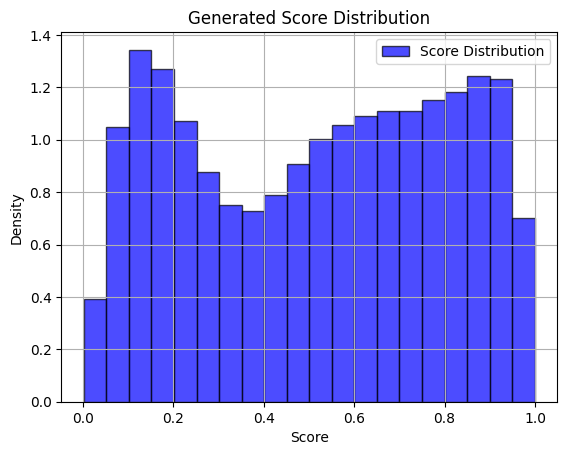

In [77]:

# 绘制分布
plt.hist(sampled_df['score'], bins=20, alpha=0.7, color='blue', edgecolor='black', density=True, label='Score Distribution')
plt.title('Generated Score Distribution')
plt.xlabel('Score')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

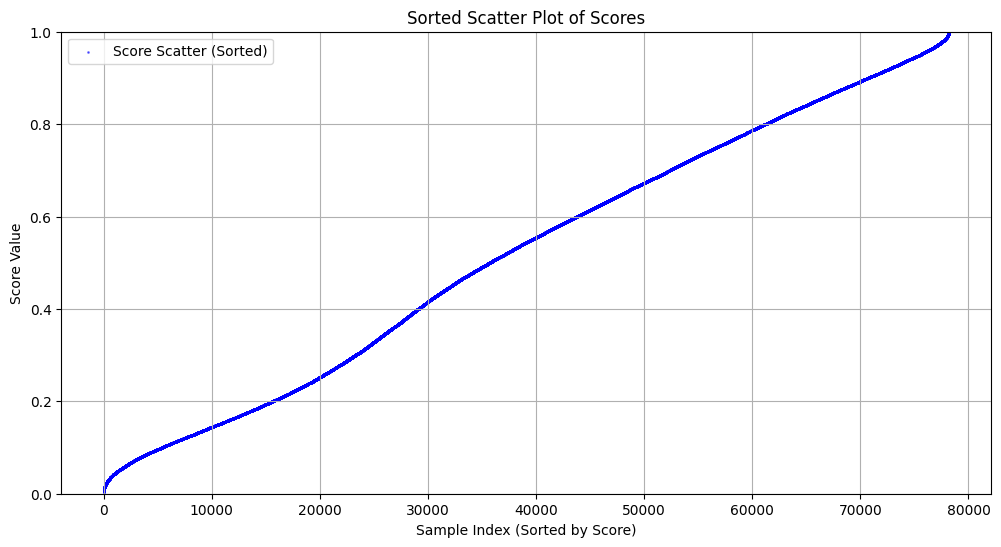

In [78]:
# 为绘图目的创建排序后的索引，而不改变原始 DataFrame 顺序
sorted_indices = np.argsort(sampled_df['score'])
sorted_scores = sampled_df['score'].iloc[sorted_indices]

# 绘制散点图
plt.figure(figsize=(12, 6))
plt.scatter(range(len(sorted_scores)), sorted_scores, s=1, alpha=0.5, color='blue', label='Score Scatter (Sorted)')
plt.title('Sorted Scatter Plot of Scores')
plt.xlabel('Sample Index (Sorted by Score)')
plt.ylabel('Score Value')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

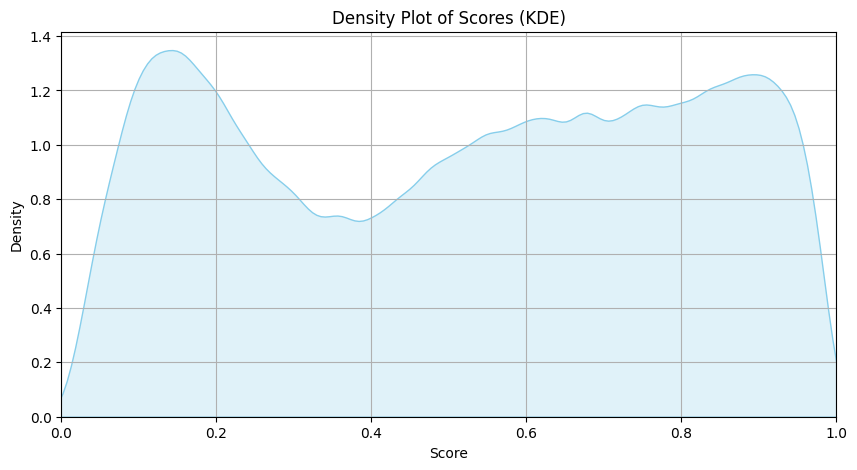

In [80]:
# 绘制核密度估计图
plt.figure(figsize=(10, 5))
sns.kdeplot(sampled_df['score'], bw_adjust=0.5, fill=True, color='skyblue')
plt.title('Density Plot of Scores (KDE)')
plt.xlabel('Score')
plt.ylabel('Density')
plt.xlim(0, 1)
plt.grid(True)
plt.show()

In [ ]:
data_dict = sampled_df.to_dict(orient="records")
data_dict

In [83]:
# 保存为 JSON 文件，带缩进
with open("data_for_train_bert_need_shuffle.json", "w", encoding="utf-8") as f:
    json.dump(data_dict, f, indent=4, ensure_ascii=False)

In [86]:
dataset=load_dataset('json',data_files='/root/for_may_conference/remake/data_for_train_bert_need_shuffle.json')
dataset

Generating train split: 78200 examples [00:13, 5745.96 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'score'],
        num_rows: 78200
    })
})